<a href="https://colab.research.google.com/github/ikrarkhaera/PYTHON-MG-14-FIX-BGT/blob/main/Tugas_14_PYTHON_IKRAR_KHAERA_ARFAT_1101190013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#Rumus PL
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [20]:
#Input parameter utama
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #user
PTx=30000 #mW
GTx=10 #dB
GRx=2 #dB
Bw=5000000 #Hz
d=np.random.randint(dmin,dmax,N)

#Mengurutkan ascending nilai parameter d
d_sort=d[np.argsort(d)]

In [22]:
#Input parameter sesuai ketentuan (A=variasi area dan B=variasi frekuensi)
fA=1800 #MHz
locA=['urban','open','suburban']
fB=[700,900,1800] #MHz
locB='urban'

#Mendefinisikan PL variasi area
LpA=[cos(fA,locA[0],tower,user,d_sort),cos(fA,locA[1],tower,user,d_sort),cos(fA,locA[2],tower,user,d_sort)]

#Mendefinisikan PL variasi frekuensi
LpB=[cos(fB[0],locB,tower,user,d_sort),cos(fB[1],locB,tower,user,d_sort),cos(fB[2],locB,tower,user,d_sort)]

In [23]:
#Rumus PRx
def PRx(PTx,PL,GTx,GRx):
  PRx=10**(((10*np.log10(PTx))-PL+GTx+GRx)/10) #mW
  return PRx

#Mendefinisikan PRx variasi area
PRxA=[PRx(PTx,LpA[0],GTx,GRx),PRx(PTx,LpA[1],GTx,GRx),PRx(PTx,LpA[2],GTx,GRx)]#mW

#Mendefinisikan PRx variasi frekuensi
PRxB=[PRx(PTx,LpB[0],GTx,GRx),PRx(PTx,LpB[1],GTx,GRx),PRx(PTx,LpB[2],GTx,GRx)]#mW

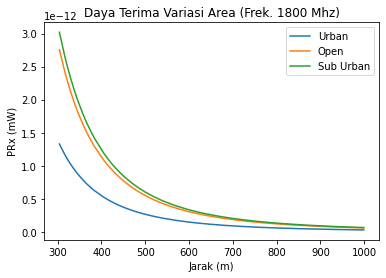

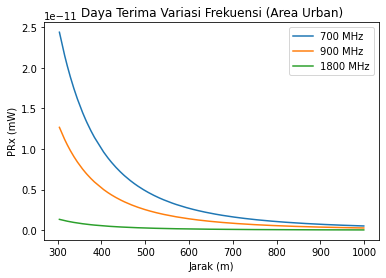

In [13]:
#Menampilkan PRx variasi area dalam grafik
plt.figure()
plt.plot(d_sort,PRxA[0],label='Urban')
plt.plot(d_sort,PRxA[1],label='Open')
plt.plot(d_sort,PRxA[2],label='Sub Urban')
plt.legend()
plt.title('Daya Terima Variasi Area (Frek. 1800 Mhz)')
plt.xlabel('Jarak (m)')
plt.ylabel('PRx (mW)')
plt.show()
print('\n')

#Menampilkan PRx variasi frekuensi dalam grafik
plt.figure()
plt.plot(d_sort,PRxB[0],label='700 MHz')
plt.plot(d_sort,PRxB[1],label='900 MHz')
plt.plot(d_sort,PRxB[2],label='1800 MHz')
plt.legend()
plt.title('Daya Terima Variasi Frekuensi (Area Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('PRx (mW)')
plt.show()

In [24]:
#Rumus SNR
def SNR(PRx,Bw):
  Noise=10**((-174+10*np.log10(Bw))/10) #mW
  SNR=PRx/Noise
  return SNR 

#Mendefinisikan SNR variasi area
SNRa=[SNR(PRxA[0],Bw),SNR(PRxA[1],Bw),SNR(PRxA[2],Bw)]

#Mendefinisikan SNR variasi frekuensi
SNRb=[SNR(PRxB[0],Bw),SNR(PRxB[1],Bw),SNR(PRxB[2],Bw)]

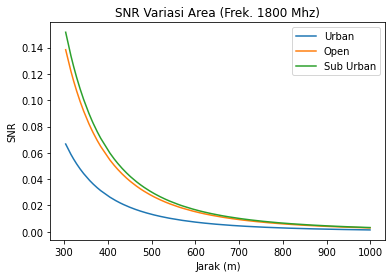

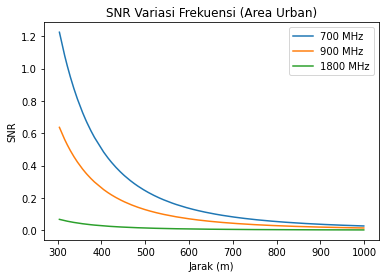

In [15]:
#Menampilkan SNR variasi area dalam grafik
plt.figure()
plt.plot(d_sort,SNRa[0],label='Urban')
plt.plot(d_sort,SNRa[1],label='Open')
plt.plot(d_sort,SNRa[2],label='Sub Urban')
plt.legend()
plt.title('SNR Variasi Area (Frek. 1800 Mhz)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()
print('\n')

#Menampilkan SNR variasi frekuensi dalam grafik
plt.figure()
plt.plot(d_sort,SNRb[0],label='700 MHz')
plt.plot(d_sort,SNRb[1],label='900 MHz')
plt.plot(d_sort,SNRb[2],label='1800 MHz')
plt.legend()
plt.title('SNR Variasi Frekuensi (Area Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

In [25]:
#Rumus Kapasitas Seluler
def C(Bw,SNR):
  C=Bw*np.log2(1+SNR) #bps
  return C 

#Mendefinisikan Kapasitas variasi area
Ca=[C(Bw,SNRa[0]),C(Bw,SNRa[1]),C(Bw,SNRa[2])] #bps

#Mendefinisikan Kapasitas variasi frekuensi
Cb=[C(Bw,SNRb[0]),C(Bw,SNRb[1]),C(Bw,SNRb[2])] #bps

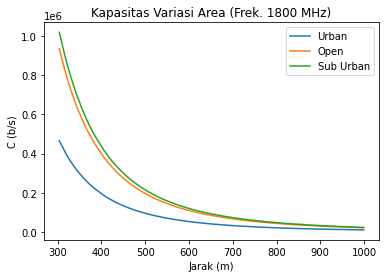

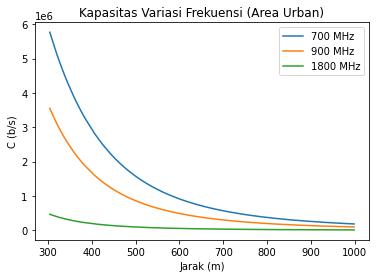

In [17]:
#Menampilkan Kapasitas variasi area dalam grafik
plt.figure()
plt.plot(d_sort,Ca[0],label='Urban')
plt.plot(d_sort,Ca[1],label='Open')
plt.plot(d_sort,Ca[2],label='Sub Urban')
plt.legend()
plt.title('Kapasitas Variasi Area (Frek. 1800 MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('C (b/s)')
plt.show()
print('\n')

#Menampilkan Kapasitas variasi frekuensi dalam grafik
plt.figure()
plt.plot(d_sort,Cb[0],label='700 MHz')
plt.plot(d_sort,Cb[1],label='900 MHz')
plt.plot(d_sort,Cb[2],label='1800 MHz')
plt.legend()
plt.title('Kapasitas Variasi Frekuensi (Area Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('C (b/s)')
plt.show()